# Lab 6. Classification


**Author:** &nbsp;&nbsp;&nbsp;*Gabriel Szewczyk*</br>
**Date:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*11.04.2024*

## KNN Algorithm

### KNN Classification using own implementation - admission dataset

import data and split dataset on train and test parts

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import csv

with open('admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

implementation of classify method

In [2]:
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    # 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
    #     a. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
    calculate_distance = lambda x1, x2: np.linalg.norm(x1 - x2)    
    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
    distances = []
    for i in range(X.shape[0]):
        dist = calculate_distance(X[i], example)
        distances.append((dist, y[i]))

    # 2. posortuj kolekcję względem dystansów, rosnąco
    distances.sort(key=lambda x: x[0])

    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)
    nearest_neighbors = distances[:k]

    # 4. klasa rozważanego przykładu example będzie taka jak większość wśród k przykładów z najkrótszym dystansem
    votes = [neighbor[1] for neighbor in nearest_neighbors]
    predicted_class = np.argmax(np.bincount(votes))

    return predicted_class


set boundary for every *k*

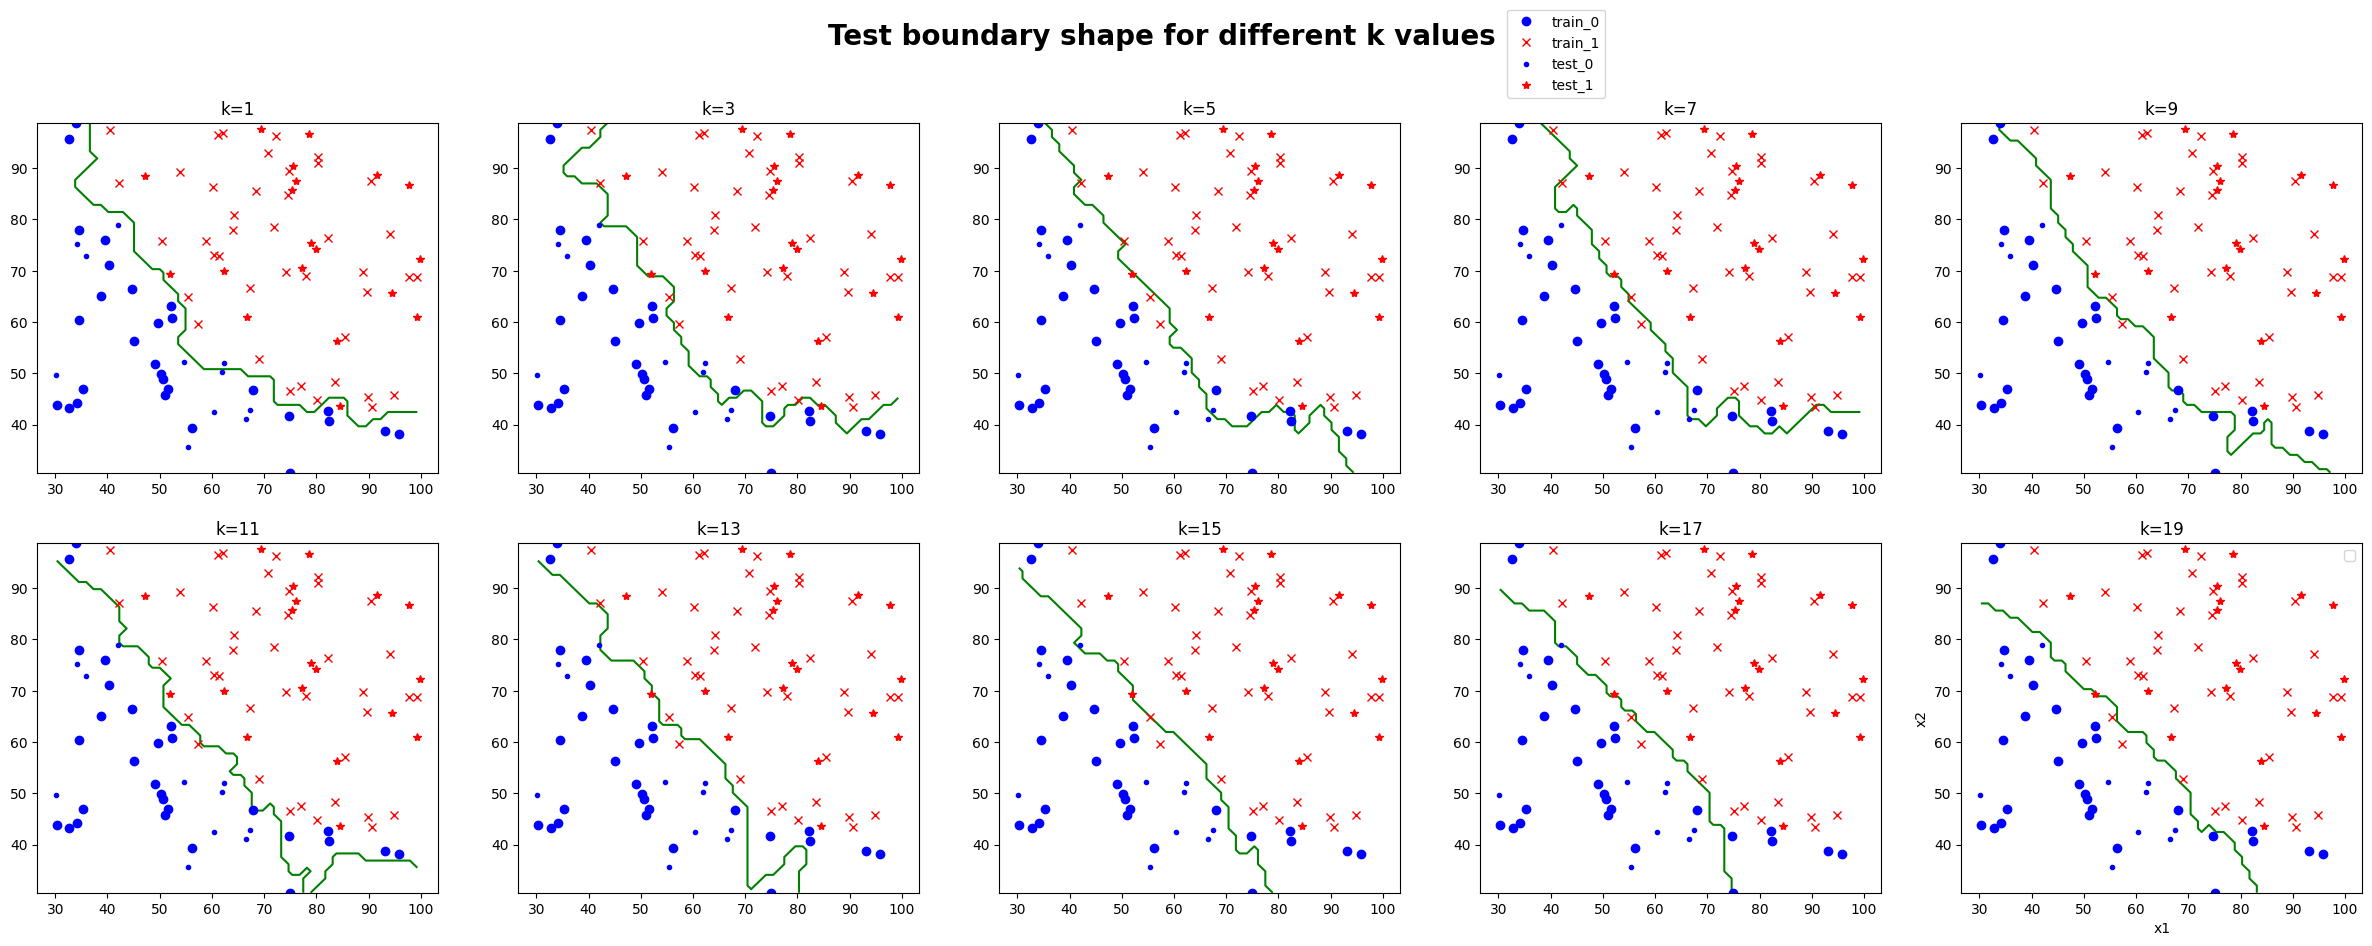

In [3]:
k_list = np.arange(1,20,2)

# setup subplot
fig, axs = plt.subplots(2, 5, figsize=(30, 10))
axs = axs.flatten()

plt.legend(['train_0', 'train_1', 'test_0', 'test_1', 'boundary'])
for i, k in enumerate(k_list):
  axs[i].set_title(f'k={k}')
  plt.xlabel('x1')
  plt.ylabel('x2')
  
  # prepare data for contour plot
  x1_res = 50
  x2_res = 50
  x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
  x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
  x1x1, x2x2 = np.meshgrid(x1, x2)
  x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
  labels_space = np.zeros((x1_res, x2_res))
  for row_idx in range(x2_res):
    for col_idx in range(x1_res):
        example = np.array([x1[col_idx], x2[row_idx]])
        pred = classify(x_train, y_train, example, k)
        labels_space[row_idx, col_idx] = pred

  # plot decision boundary
  axs[i].contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

  # plot training set
  axs[i].plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
  axs[i].plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

  # plot test set
  axs[i].plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
  axs[i].plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')
fig.suptitle("Test boundary shape for different k values", fontsize=20, fontweight='bold')
fig.legend(['train_0', 'train_1', 'test_0', 'test_1'], bbox_to_anchor=((0.65, 1)))
plt.show()

Calculate accuracy for every k and visualize

Text(0.5, 1.0, 'Accuracy for each k value')

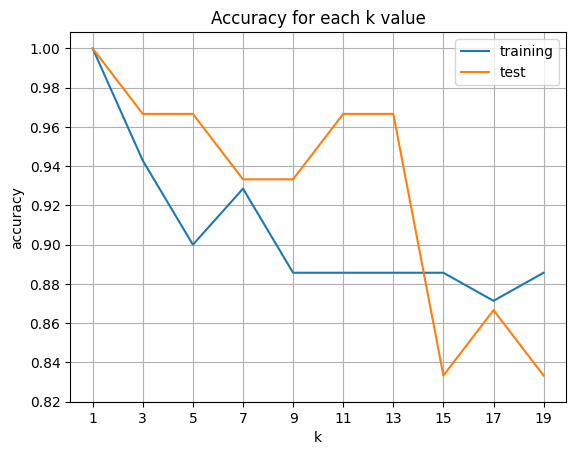

In [4]:
def calculate_accuracy(X, y, k):
    correct_predictions = 0
    total_examples = len(X)

    for i in range(total_examples):
        predicted_class = classify(X, y, X[i], k)
        if predicted_class == y[i]:
            correct_predictions += 1

    accuracy = correct_predictions / total_examples
    return accuracy

accuracy_test = [calculate_accuracy(x_test, y_test, k) for k in k_list]
accuracy_train = [calculate_accuracy(x_train, y_train, k) for k in k_list]

plt.grid()
plt.plot(k_list, accuracy_train, label='training')
plt.plot(k_list,accuracy_test, label='test')
plt.xticks(k_list)
plt.yticks(np.linspace(0.82, 1.00, num=10))
plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy for each k value')

Calculate sensitivity and positive predictions for the model that best reflects the data (k=7 is chosen)

In [5]:
def evaluate_knn(X_test, y_test, k):
    TP, FP, FN = 0, 0, 0
    for i in range(len(X_test)):
        predicted_class = classify(X, y, X_test[i], k)
        if predicted_class == 1:
            if y_test[i] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if y_test[i] == 1:
                FN += 1
    sensitivity = TP / (TP + FN)
    positive_predictions = TP + FP

    return sensitivity, positive_predictions

accuracy = calculate_accuracy(x_test, y_test, 7)
sensitivity, pos_predictions = evaluate_knn(x_test, y_test, 7)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {sensitivity:.2f}")
print(f"Positive Predictions: {pos_predictions}")

Accuracy: 0.93
Recall: 1.00
Positive Predictions: 19


### KNN Classification using sklearn module - admission dataset

use this method for classification

In [6]:
from sklearn.neighbors import KNeighborsClassifier

k_list = np.arange(1,20,2)
for k in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    pred = knn_classifier.predict(x_test)


set boundary for every *k*

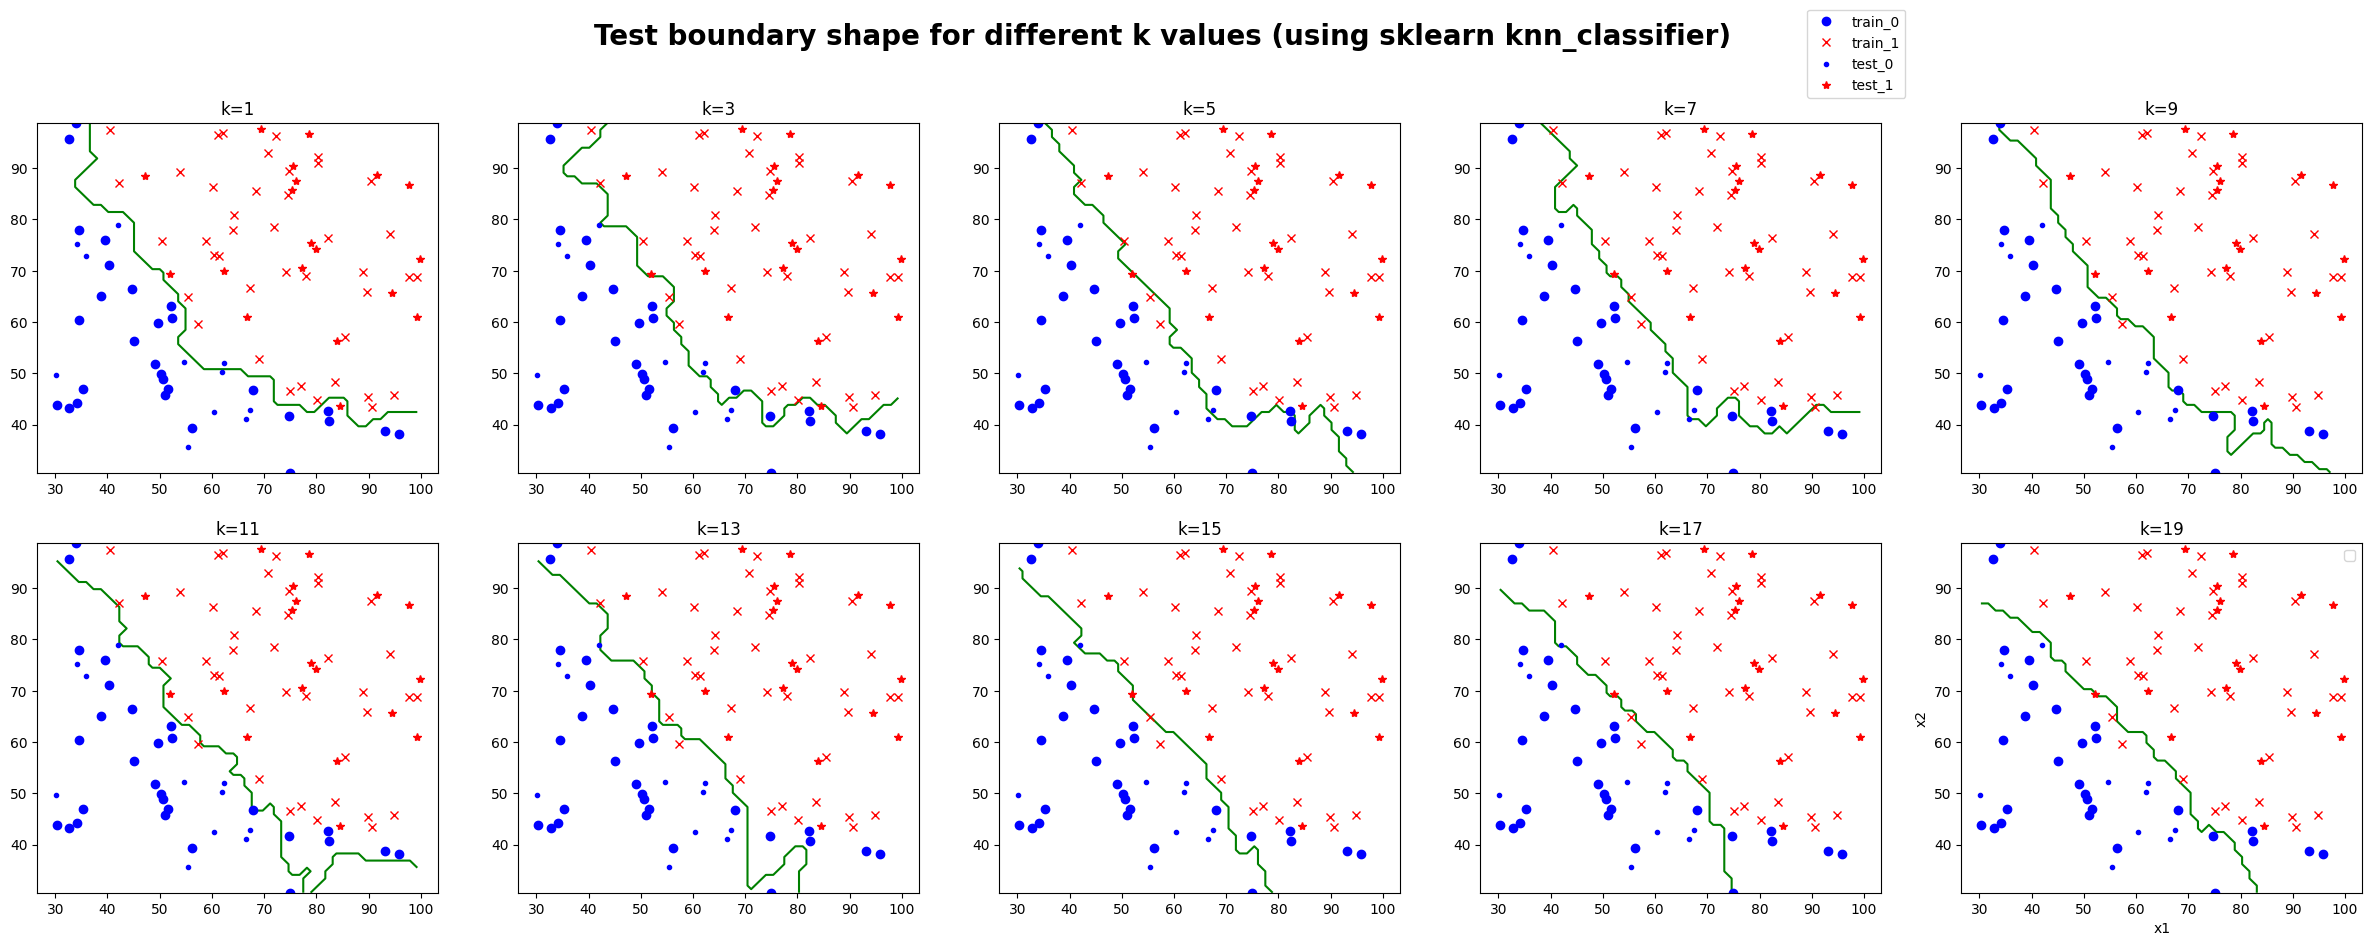

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# setup subplot
fig, axs = plt.subplots(2, 5, figsize=(30, 10))
axs = axs.flatten()

plt.legend(['train_0', 'train_1', 'test_0', 'test_1', 'boundary'])
for i, k in enumerate(k_list):
  axs[i].set_title(f'k={k}')
  plt.xlabel('x1')
  plt.ylabel('x2')
  
  # prepare data for contour plot
  x1_res = 50
  x2_res = 50
  x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
  x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
  x1x1, x2x2 = np.meshgrid(x1, x2)
  x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]

  # use sklearn knn_classifier
  knn_classifier  = KNeighborsClassifier(n_neighbors=k)
  knn_classifier .fit(x_train, y_train)
  pred = knn_classifier.predict(x1x2_range_comb)
  pred = pred.reshape(x1x1.shape)

  # plot decision boundary
  axs[i].contour(x1x1, x2x2, pred, levels=[0.5], colors='g')

  # plot training set
  axs[i].plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
  axs[i].plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

  # plot test set
  axs[i].plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
  axs[i].plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')
fig.suptitle("Test boundary shape for different k values (using sklearn knn_classifier)", fontsize=20, fontweight='bold')
fig.legend(['train_0', 'train_1', 'test_0', 'test_1'], bbox_to_anchor=((0.75, 1)))
plt.show()

Calculate accuracy for every k and visualize

Text(0.5, 1.0, 'Accuracy for each k value')

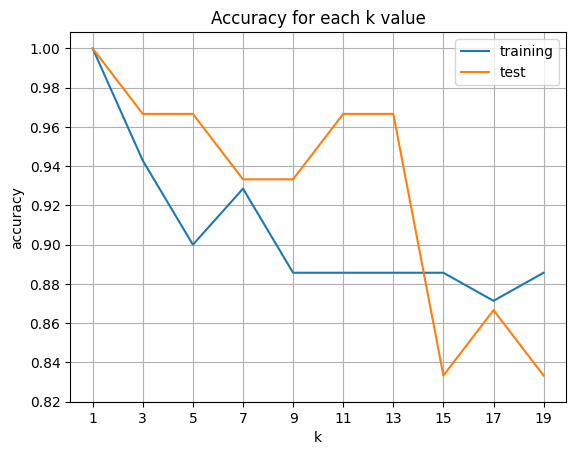

In [8]:
def calculate_accuracy_sklearn(X, y, k):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X, y)
    pred = knn_classifier.predict(X)

    correct_predictions = sum(pred == y)
    total_examples = len(y)

    accuracy = correct_predictions / total_examples
    return accuracy

accuracy_test = [calculate_accuracy_sklearn(x_test, y_test, k) for k in k_list]
accuracy_train = [calculate_accuracy_sklearn(x_train, y_train, k) for k in k_list]

plt.grid()
plt.plot(k_list, accuracy_train, label='training')
plt.plot(k_list,accuracy_test, label='test')
plt.xticks(k_list)
plt.yticks(np.linspace(0.82, 1.00, num=10))
plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy for each k value')

Calculate sensitivity and positive predictions for the model that best reflects the data (k=7 is chosen)

In [9]:
from sklearn.metrics import confusion_matrix

knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(x_train, y_train)
pred = knn_classifier.predict(x_test)

confmat = confusion_matrix(y_test, pred)
accuracy = calculate_accuracy_sklearn(x_test, y_test, k=7)
positive_pred = confmat.diagonal()  / confmat.sum(axis=0) # calculate positive predictions of model
sensitivity = confmat.diagonal()  / confmat.sum(axis=1) # calculate sensitivity for data
print(f"Accuracy: {accuracy:.2f}")
print("\nReport:")
print("cls | se | pp")  # senisitivity and number of good predictions
for i in range(len(sensitivity)):
    print(" {} | {:.{}f} | {:.{}f}".format(i, sensitivity[i], 2, positive_pred[i], 2))

Accuracy: 0.93

Report:
cls | se | pp
 0 | 0.91 | 1.00
 1 | 1.00 | 0.95


*Outputs for different k values comparing sklearn model and mine show similar accuracy plots and test boundary shapes. However, the number of positive predictions differs. This discrepancy may be caused by a potential error in the implementation of __evaluate_knn__ function for calculating positive predictions for my __classify__ function.*

### KNN Classification using sklearn module - digits dataset

import digits dataset  and split dataset on train and test parts

In [10]:
from sklearn.datasets import load_digits
 
data = load_digits()
y = data['target']
X = data['data']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

Calculate sensitivity and positive predictions for every k


k = 1:
Accuracy: 1.00
Report:
cls | se | pp
 0 | 1.00 | 1.00
 1 | 1.00 | 0.98
 2 | 1.00 | 1.00
 3 | 1.00 | 1.00
 4 | 1.00 | 1.00
 5 | 1.00 | 1.00
 6 | 1.00 | 1.00
 7 | 1.00 | 1.00
 8 | 0.98 | 1.00
 9 | 1.00 | 1.00
confusion_matrix:
[[57  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0 67  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 63  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  1  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 55]]

k = 3:
Accuracy: 0.99
Report:
cls | se | pp
 0 | 1.00 | 1.00
 1 | 1.00 | 0.98
 2 | 1.00 | 1.00
 3 | 0.98 | 1.00
 4 | 0.99 | 1.00
 5 | 1.00 | 1.00
 6 | 1.00 | 1.00
 7 | 1.00 | 0.96
 8 | 0.98 | 1.00
 9 | 1.00 | 1.00
confusion_matrix:
[[57  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  1  0  0]
 [ 0  0  0  0 66  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0 

Text(0.5, 1.0, 'Accuracy for each k value')

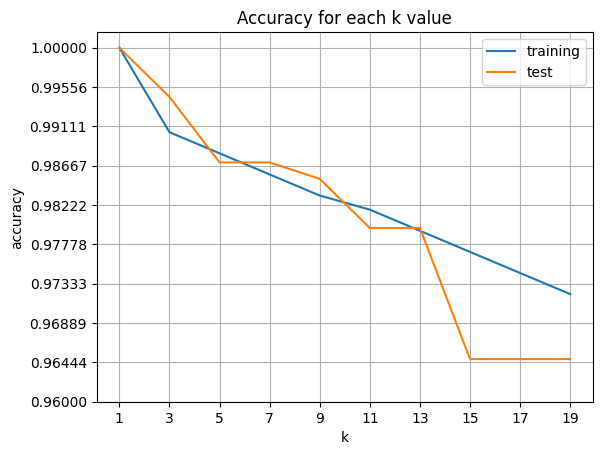

In [11]:
k_list = np.arange(1,20,2)

for k in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    pred = knn_classifier.predict(x_test)

    confmat = confusion_matrix(y_test, pred)
    accuracy = calculate_accuracy_sklearn(x_test, y_test, k=k)
    positive_pred = confmat.diagonal()  / confmat.sum(axis=0) # calculate positive predictions of model
    sensitivity = confmat.diagonal()  / confmat.sum(axis=1) # calculate sensitivity for data
    print(f"\nk = {k}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Report:")
    print("cls | se | pp")  # senisitivity and number of good predictions
    for i in range(len(sensitivity)):
        print(" {} | {:.{}f} | {:.{}f}".format(i, sensitivity[i], 2, positive_pred[i], 2))
    print("confusion_matrix:")
    print(confmat)

accuracy_test = [calculate_accuracy_sklearn(x_test, y_test, k) for k in k_list]
accuracy_train = [calculate_accuracy_sklearn(x_train, y_train, k) for k in k_list]

plt.grid()
plt.plot(k_list, accuracy_train, label='training')
plt.plot(k_list,accuracy_test, label='test')
plt.xticks(k_list)
plt.yticks(np.linspace(0.96, 1.00, num=10))
plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy for each k value')

*Based on the obtained accuracy results, classification report, and the plotted chart illustrating the accuracy for different values of k, I have chosen k=3.* 

In [12]:
# The process of cross-validation with five splits

# from sklearn.model_selection import cross_val_score

# cv_scores = []
# for k in k_list:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
#     cv_scores.append(scores.mean())
# optimal_k = k_list[cv_scores.index(max(cv_scores))]
# print("Best k:", optimal_k)

In [13]:
from sklearn.metrics import classification_report

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)
pred = knn_classifier.predict(x_test)

confmat = confusion_matrix(y_test, pred)
accuracy = calculate_accuracy_sklearn(x_test, y_test, k=k)
report = classification_report(y_test, pred)

print(f"\nk = {k}:")
print(f"Accuracy: {accuracy:.2f}")
print("Report")
print(report)
print("confusion_matrix:")
print(confmat)


k = 3:
Accuracy: 0.99
Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        48
           3       1.00      0.98      0.99        49
           4       1.00      0.99      0.99        67
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        63
           7       0.96      1.00      0.98        44
           8       1.00      0.98      0.99        57
           9       1.00      1.00      1.00        55

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

confusion_matrix:
[[57  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  1  0  0]
 [ 0  0  0  0 66  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0

Confusion matrix heatmap

Text(0.5, 23.52222222222222, 'Predicted class affiliation')

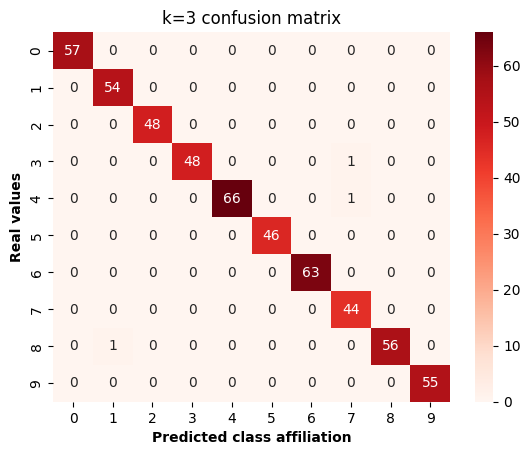

In [14]:
from seaborn import heatmap
labels = np.asarray(['True Neg', 'False Pos', 'False Neg', 'True Pos']).reshape(2, 2)
heatmap(confmat, annot=True, fmt='', cmap='Reds', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('k=3 confusion matrix')
plt.ylabel('Real values', fontweight='bold')
plt.xlabel('Predicted class affiliation', fontweight='bold')

## Decision Tree Algorithm

### Decision-Tree Classification using sklearn module - admission dataset

Reload data from admission to variables

In [28]:
with open('admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

set boundary for each lvl in range 1 to 4

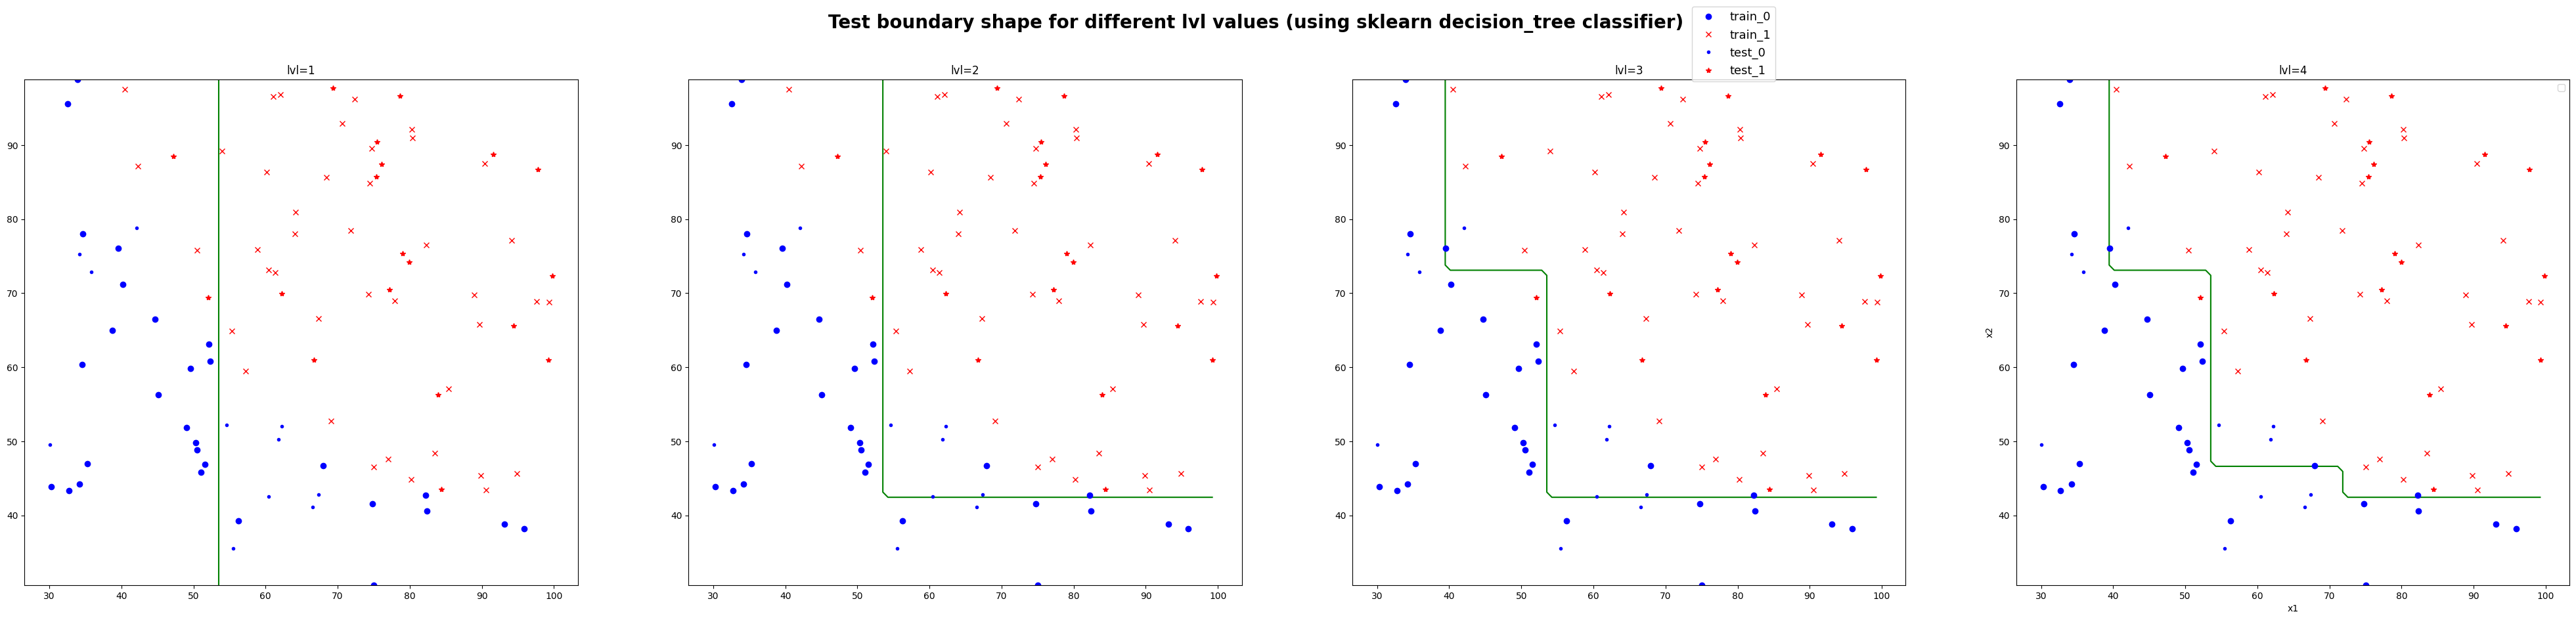

In [30]:
from sklearn.tree import DecisionTreeClassifier

lvl_list = np.arange(1,5) # test levels in range 1-4

# setup subplot
fig, axs = plt.subplots(1, 4, figsize=(50, 10))
axs = axs.flatten()

plt.legend(['train_0', 'train_1', 'test_0', 'test_1', 'boundary'])
for i, lvl in enumerate(lvl_list):
  axs[i].set_title(f'lvl={lvl}')
  plt.xlabel('x1')
  plt.ylabel('x2')
  
  # prepare data for contour plot
  x1_res = 50
  x2_res = 50
  x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
  x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
  x1x1, x2x2 = np.meshgrid(x1, x2)
  x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]

  # use sklearn decision_tree_classifier
  decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
  decision_tree.fit(x_train, y_train)
  pred = decision_tree.predict(x1x2_range_comb)
  pred = pred.reshape(x1x1.shape)

  # plot decision boundary
  axs[i].contour(x1x1, x2x2, pred, levels=[0.5], colors='g')

  # plot training set
  axs[i].plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
  axs[i].plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

  # plot test set
  axs[i].plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
  axs[i].plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')
fig.suptitle("Test boundary shape for different lvl values (using sklearn decision_tree classifier)", fontsize=20, fontweight='bold')
fig.legend(['train_0', 'train_1', 'test_0', 'test_1'], bbox_to_anchor=((0.66, 1)), prop={'size': 13})

Calculate accuracy for each level and visualize differences

Text(0.5, 1.0, 'Accuracy for each lvl value')

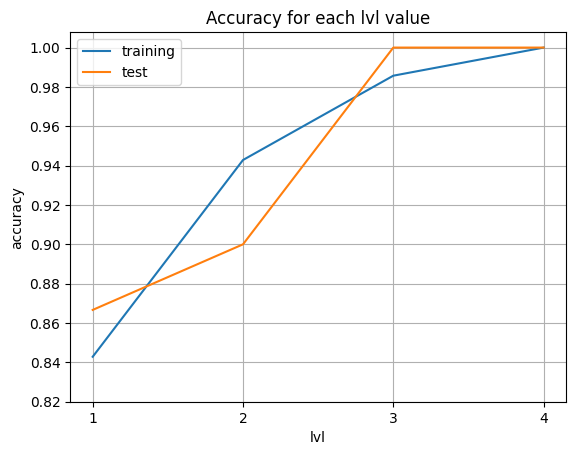

In [17]:
def calculate_accuracy_deicison_tree(X, y, lvl):
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(X, y)
    pred = decision_tree.predict(X)
    correct_predictions = sum(pred == y)
    total_examples = len(y)
    accuracy = correct_predictions / total_examples
    return accuracy

accuracy_test_dt = [calculate_accuracy_deicison_tree(x_test, y_test, lvl) for lvl in lvl_list]
accuracy_train_dt = [calculate_accuracy_deicison_tree(x_train, y_train, lvl) for lvl in lvl_list]

plt.grid()
plt.plot(lvl_list, accuracy_train_dt, label='training')
plt.plot(lvl_list,accuracy_test_dt, label='test')
plt.xticks(lvl_list)
plt.yticks(np.linspace(0.82, 1.00, num=10))
plt.legend()
plt.xlabel('lvl')
plt.ylabel('accuracy')
plt.title('Accuracy for each lvl value')


### Decision-Tree Classification using sklearn module - digits dataset

import digits dataset again and split dataset on train and test parts

In [18]:
data = load_digits()
y = data['target']
X = data['data']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

Calculate sensitivity and positive predictions for every k



lvl = 1:
Accuracy: 0.21
Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        48
           3       0.16      0.92      0.28        49
           4       0.00      0.00      0.00        67
           5       0.00      0.00      0.00        46
           6       0.24      0.98      0.38        63
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00        55

    accuracy                           0.20       540
   macro avg       0.04      0.19      0.07       540
weighted avg       0.04      0.20      0.07       540



lvl = 2:
Accuracy: 0.39
Report
              precision    recall  f1-score   support

           0       0.34      0.95      0.50        57
           1       0.00      0.00      0.00        54
           2

Text(0.5, 1.0, 'Accuracy for each lvl value')

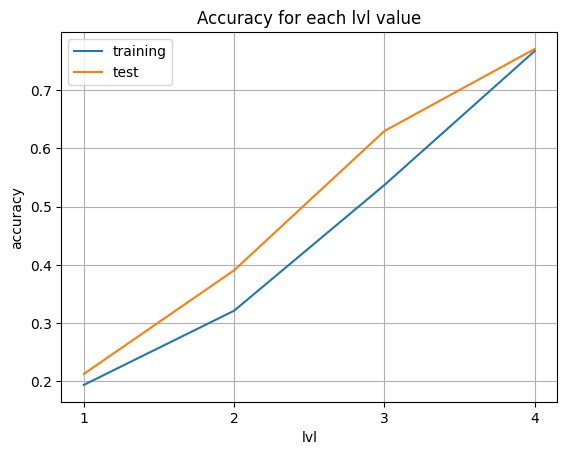

In [19]:
from warnings import filterwarnings
filterwarnings("ignore")

lvl_list = np.arange(1,5)

for lvl in lvl_list:
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(x_train, y_train)
    pred = decision_tree.predict(x_test)

    confmat = confusion_matrix(y_test, pred)
    accuracy = calculate_accuracy_deicison_tree(x_test, y_test, lvl=lvl)

    report = classification_report(y_test, pred)
    print(f"\n\nlvl = {lvl}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Report")
    print(report)

accuracy_test_dt = [calculate_accuracy_deicison_tree(x_test, y_test, lvl) for lvl in lvl_list]
accuracy_train_dt = [calculate_accuracy_deicison_tree(x_train, y_train, lvl) for lvl in lvl_list]

plt.grid()
plt.plot(lvl_list, accuracy_train_dt, label='training')
plt.plot(lvl_list,accuracy_test_dt, label='test')
plt.xticks(lvl_list)
plt.legend()
plt.xlabel('lvl')
plt.ylabel('accuracy')
plt.title('Accuracy for each lvl value')

In [20]:
# The process of cross-validation with five splits
# from sklearn.model_selection import cross_val_score
# cv_scores = []
# for lvl in lvl_list:
#     dt_clas = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
#     scores = cross_val_score(dt_clas, X, y, cv=5, scoring='accuracy')
#     cv_scores.append(scores.mean())
# optimal_lvl = lvl_list[cv_scores.index(max(cv_scores))]
# print("Best k:", optimal_lvl)

Classification results for best lvl = 4

In [21]:
lvl=4
knn_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
knn_classifier.fit(x_train, y_train)
pred = knn_classifier.predict(x_test)

confmat = confusion_matrix(y_test, pred)
accuracy = calculate_accuracy_deicison_tree(x_test, y_test, lvl=lvl)
report = classification_report(y_test, pred)

print(f"\nlvl = {lvl}:")
print(f"Accuracy: {accuracy:.2f}")
print("Report")
print(report)


lvl = 4:
Accuracy: 0.77
Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        57
           1       0.63      0.57      0.60        54
           2       0.63      0.60      0.62        48
           3       0.79      0.86      0.82        49
           4       0.71      0.61      0.66        67
           5       0.68      0.98      0.80        46
           6       0.89      0.89      0.89        63
           7       0.55      0.52      0.53        44
           8       0.69      0.65      0.67        57
           9       0.85      0.82      0.83        55

    accuracy                           0.74       540
   macro avg       0.74      0.74      0.74       540
weighted avg       0.74      0.74      0.74       540



Confusion matrix heatmap for decision tree outcome

Text(0.5, 23.52222222222222, 'Predicted class affiliation')

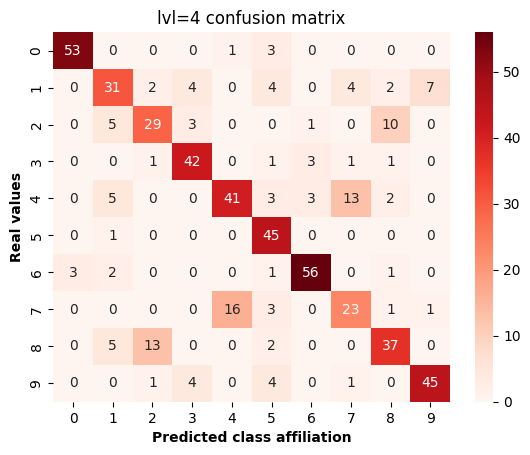

In [22]:
labels = np.asarray(['True Neg', 'False Pos', 'False Neg', 'True Pos']).reshape(2, 2)
heatmap(confmat, annot=True, fmt='', cmap='Reds', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('lvl=4 confusion matrix')
plt.ylabel('Real values', fontweight='bold')
plt.xlabel('Predicted class affiliation', fontweight='bold')

## Own implementation of the decision tree generation algorithm (additional task)

Calculate entropy

In [23]:
def calculate_entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1 - p) * (np.log2(1 - p))

Information Gain (IG) tells us how a data split based on a certain feature organized the subsets separated by that feature.

In [24]:
def calculate_ig(x, y, feature_idx, example_indices, thresh):
    '''
    :param x: zbiór przykladów, macierz m na n
    :param y: zbiór wartości, wektor o długości m o wartościach 0 lub 1
    :param feature_idx: indeks cechy względem której chcemy policzyc IG
    :param example_indices: indeksy przykładów należących do aktualnie rozważanego przykładu.
                            Funkcja ta będzie wywoływana dla podzbiorów zbioru uczącego i ten podzbior będzie przekazywany przez
                            indeksy przykłądów z tego podzbioru. x i y zawierają cały zbiór uczący
    :param thresh: granica decyzji dla wskazanej cechy feature_idx dla której segregujemy dane na lewą i prawą stronę rozgałęzienia
    :return: Information Gain
    '''
 
    p = sum(y[i] for i in example_indices) / len(example_indices)# część przykładów należących do klasy z podzbioru example_indices (w przedziale 0-1, gdzie 0 oznacza brak przykładów należących do klasy, a 1 oznacza, że wszystkie przykłady należą do klasy)
    entropy = calculate_entropy(p)
 
    left_branch_examples = [] # tutaj powinny się znaleźć wszystkie przykłady (ich indeksy), 
                              # których cecha o indeksie feature_idx jest mniejsza niż thresh
    right_branch_examples = [] # tutaj powinny się znaleźć wszystkie przykłady (ich indeksy), 
                               # których cecha o indeksie feature_idx jest większa lub równa thresh
 
    # na podstawie cechy i progu dzielimy przyklady na lewa i prawa galaz
    for i in example_indices:
        if x[i][feature_idx] < thresh:
            left_branch_examples.append(i)
        else:
            right_branch_examples.append(i)
    
    w_left = len(left_branch_examples) / len(example_indices) # ułamek reprezentujący część przykładów po lewej stronie rozgałęzienia względem początkowego zbioru example_indices
    p_left = sum(y[i] for i in left_branch_examples) / len(left_branch_examples)  if len(left_branch_examples) > 0 else 0# część przykładów należących do klasy z podzbioru left_branch_examples
 
    w_right = len(right_branch_examples) / len(example_indices)# ułamek reprezentujący część przykładów po prawe stronie rozgałęzienia względem początkowego zbioru example_indices
    p_right = sum(y[i] for i in right_branch_examples) / len(right_branch_examples) if len(right_branch_examples) > 0 else 0 # część przykładów należących do klasy z podzbioru right_branch_examples
 
    w_entropy = w_left * calculate_entropy(p_left) + w_right * calculate_entropy(p_right) # entropia ważona 
 
    ig = entropy - w_entropy # information gain
 
    return ig, left_branch_examples, right_branch_examples

Use example data on algorithm

In [25]:
x_ig_test = np.array([
    [0, 2],
    [1, 1],
    [2, 1],
    [1, 2],
    [2, 2],
    [2, 3],
])
y_ig_test = np.array([0, 0, 0, 1, 1, 1])
feature_idx = 1
thresh = 1.1
example_indices = [0, 1, 2, 3, 4]
ig_test, left_branch, right_branch = calculate_ig(x_ig_test, y_ig_test, feature_idx, example_indices, thresh)
print(ig_test)

0.4199730940219749


*expected output is 0.5118026774274238*

The implementation of an algorithm that calculates IG for each feature and selects the feature with such tresh, for which IG is the highest.

In [26]:
# klasa pomocnicza reprezentująca węzeł w drzewie
class Node:
    def __init__(self, feature_idx, thresh, level):
        self.feature_idx = feature_idx
        self.thresh = thresh
        self.left = None
        self.right = None
        self.level = level
 
 
def find_best_split(x_train, y_train, example_indices, level_cap, min_ig_threshold=0.01, level=0):
    # predefinicja zmiennych
    n = x_train.shape[1]  # Number of features
    best_ig = float("-inf")
    best_ig_feature = None
    best_ig_thresh = None
    
    
    # dla każdej cechy w zbiorze danych
    for feature_idx in range(n):  
        features = sorted(x_train[example_indices, feature_idx])  # wybierz aktualnie rozważaną cechę i posortuj rosnąco 
        for feature_pairs in zip(features[:-1], features[1:]):
            thresh = (feature_pairs[0] + feature_pairs[1]) / 2
            ig, left_split_temp, right_split_temp = calculate_ig(x_train, y_train, feature_idx, example_indices, thresh)
            # aktualizacja IG jeśli aktualny jest wyższy
            if ig > best_ig:
                best_ig = ig
                best_ig_feature = feature_idx
                best_ig_thresh = thresh
 
    # po sprawdzeniu wszystkich par cecha - próg wybierz tę parę o największym IG
    node = Node(best_ig_feature, best_ig_thresh, level)
 
    #     Algorytm generowania można zakończyć gdy:
    # * osiągniemy zdefiniowaną głębokość drzewa,
    # * IG jest mniejszy od zadanego progu (dalszy podział w praktyce nie wnosi nic nowego),
    # * w podzbiorze zostały tylko elementy należące do jednej z klas.
    if level >= level_cap or best_ig < min_ig_threshold or len(left_split) == 0 or len(right_split) == 0:
        node.left = np.array(y_train[left_split]).mean() if len(left_split) > 0 else None
        node.right = np.array(y_train[right_split]).mean() if len(right_split) > 0 else None
        return node
 
    return node

def travers(node: Node, example):
    thresh = node.thresh
    feature_idx = node.feature_idx
 
    if example[feature_idx] < thresh:
        if isinstance(node.left, Node):
            return travers(node.left, example)
        else:
            return node.left
    else:
        if isinstance(node.right, Node):
            return travers(node.right, example)
        else:
            return node.right

Test on data from 1st exercise and predict decision tree

In [27]:
# root_node = find_best_split(x_train, y_train, list(range(len(y_train))), level_cap=1)

# y_pred = np.zeros(len(y_test))
# for test_example_idx, test_example in enumerate(x_test):
#     pred = travers(root_node, test_example)
#     y_pred[test_example_idx] = np.round(pred)